In [15]:
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing,feature_selection
## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers
from time import time
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
review1=pd.read_csv(r'C:\Users\11638\Favorites\Code\Project\Review_project_sentiment_wUser.csv')

In [17]:
review1.head(2)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,...,language,text_clean,read_ease,polarity,subjectivity,Adj_ratio,review_count,NumElite,average_stars,NumofWords
0,1073206,JdReKgETiiJEDmshrO4TLw,pyarmAnR-i-qookQamqRTA,V2GOReqPvr8qpCC7sWfoTw,1.0,17,1,0,Just to let this car company that people DO re...,2014-03-06 12:38:52,...,en,let car company people read yelp check review ...,85.49,-0.500000,1.000000,0.120000,9,0,3.00,56
1,6229216,zL4se_Ixdcl8kvTOHCS3rg,s16-BUo-orUsELvMu5ocKg,VH0Ib9S3E-dxbQdQC4rffg,1.0,15,6,4,Mistral was the worst dining experience I have...,2010-07-22 18:08:01,...,en,mistral worst dining experience ever life bad ...,79.19,0.029864,0.502499,0.225888,1777,10,3.82,767


In [18]:
X1 = review1[["read_ease", "polarity", "subjectivity", 
                           "Adj_ratio",'review_count','NumElite','NumofWords']]
Y1 = review1[["useful_level"]]
X2 = review1[["useful_level", "read_ease", "polarity", "subjectivity", 
                           "Adj_ratio",'review_count','NumElite','NumofWords']]

In [19]:
sample = X2.sample(n = 5000)

In [20]:
Y = np.array(sample["useful_level"].values)

In [21]:
X = sample[[ "read_ease", "polarity", "subjectivity", 
                           "Adj_ratio",'review_count','NumElite','NumofWords']]

In [22]:
## split dataset
X_train, X_test,y_train,y_test = model_selection.train_test_split(X1,Y1, test_size=0.1,stratify=Y1)# 10% test size

In [23]:
X_train1, X_valid,y_train1,y_valid = model_selection.train_test_split(X_train,y_train, test_size=0.2,stratify=y_train)# 20% validation

In [24]:
X_train1

,read_ease,polarity,subjectivity,Adj_ratio,review_count,NumElite,NumofWords
4345,62.21,-0.700000,0.666667,0.106061,21,0,163
21818,70.57,0.080245,0.476340,0.184143,13,0,803
8245,9.33,0.130132,0.520418,0.204545,75,0,547
49733,97.94,0.296667,0.520000,0.083333,91,0,78
31403,90.80,0.131886,0.502856,0.210191,193,3,975
...,...,...,...,...,...,...,...
38745,66.74,0.342500,0.530000,0.571429,7,0,13
37421,91.51,0.253993,0.503299,0.275000,20,0,68
48719,76.45,0.236023,0.489859,0.187970,762,5,282
46978,94.66,-0.261667,0.676667,0.179688,511,11,254


In [ ]:
t0 = time()
import xgboost 
 
# initializing all the base model objects with default parameters
model_1 = LogisticRegression()
model_2 = xgboost.XGBClassifier()
model_3 = GaussianNB()
model_4 = RandomForestClassifier()
model_5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

# tfidf
model_1.fit(X_train1, y_train1)
val_pred_1 = model_1.predict(X_valid)
test_pred_1 = model_1.predict(X_test)
final_pred_Prob = model_2.predict_proba(X_test)
# converting to dataframe
val_pred_1 = pd.DataFrame(val_pred_1)
test_pred_1 = pd.DataFrame(test_pred_1)


# concatenating validation dataset along with all the predicted validation data (meta features)

print(time() - t0)

In [ ]:
test_pred_1 = model_2.predict(X)
final_pred_Prob = model_2.predict_proba(X)
# converting to dataframe
val_pred_1 = pd.DataFrame(val_pred_1)
test_pred_1 = pd.DataFrame(test_pred_1)

In [14]:

print(mean_squared_error(Y, test_pred_1))
print(f1_score(Y, test_pred_1, average='micro'))
print(f1_score(Y, test_pred_1, average='macro'))

0.4456
0.729
0.704818533594055


In [107]:
accuracy = metrics.accuracy_score(Y, test_pred_1)
auc = metrics.roc_auc_score(Y, final_pred_Prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(Y, test_pred_1))

Accuracy: 0.75
Auc: 0.89
Detail:
              precision    recall  f1-score   support

           0       0.77      0.88      0.83      2175
           1       0.66      0.74      0.70      1539
           2       0.87      0.53      0.66      1286

    accuracy                           0.75      5000
   macro avg       0.77      0.72      0.73      5000
weighted avg       0.76      0.75      0.74      5000



LogisticRegression 0.7344729900360107 0.57129914839644870.46119721076063147

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import itertools
import matplotlib.pyplot as plt
t0 = time()
    ## test
#     predicted = model1.predict(NewXValid)
#     predicted_prob = model1.predict_proba(NewXValid)
print('Training Time:', time() - t0)
print('')
accuracy = metrics.accuracy_score(Test_y, final_pred)
auc = metrics.roc_auc_score(Test_y, final_pred_Prob, 
                                multi_class="ovr")
print('\033[1m' + 'Validation Set')
print('\033[0m')
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print('Macros:')
print("F1 Score:", f1_score(Test_y, final_pred, average='macro'))
print("Precision:", precision_score(Test_y, final_pred, average='macro'))
print("Recall:", recall_score(Test_y, final_pred, average='macro'))
print('Micros:')
print("F1 Score:", f1_score(Test_y, final_pred, average='micro'))
print("Precision:", precision_score(Test_y, final_pred, average='micro'))
print("Recall:", recall_score(Test_y, final_pred, average='micro'))


print("Detail Report:")
print(metrics.classification_report(Test_y, final_pred))

#     predicted = model1.predict(NewXtest)
#     predicted_prob = model1.predict_proba(NewXtest)
#     accuracy = metrics.accuracy_score(y_test, predicted)
#     auc = metrics.roc_auc_score(y_test, predicted_prob, 
#                                 multi_class="ovr")
#     print('\033[1m' + 'Test Set')
#     print('\033[0m')
#     print("Accuracy:",  round(accuracy,2))
#     print("Auc:", round(auc,2))
#     print('Macros:')
#     print("F1 Score:", f1_score(y_test, predicted, average='macro'))
#     print("Precision:", precision_score(y_test, predicted, average='macro'))
#     print("Recall:", recall_score(y_test, predicted, average='macro'))
#     print('Micros:')
#     print("F1 Score:", f1_score(y_test, predicted, average='micro'))
#     print("Precision:", precision_score(y_test, predicted, average='micro'))
#     print("Recall:", recall_score(y_test, predicted, average='micro'))

#     print("Detail Report:")
#     print(metrics.classification_report(y_test, predicted))
    
y_test1 = label_binarize(Test_y, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test1[:, i], final_pred_Prob[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.6,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=0.6)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from time import time


model evaluation Def Function

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import itertools
def model_evaluation(model1):
    t0 = time()
    model1.fit(NewXTrain, y_train1.astype(int))
    ## test
    predicted = model1.predict(NewXValid)
    predicted_prob = model1.predict_proba(NewXValid)
    print('Training Time:', time() - t0)
    print('')
    accuracy = metrics.accuracy_score(y_valid, predicted)
    auc = metrics.roc_auc_score(y_valid, predicted_prob, 
                                multi_class="ovr")
    print('\033[1m' + 'Validation Set')
    print('\033[0m')
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print('Macros:')
    print("F1 Score:", f1_score(y_valid, predicted, average='macro'))
    print("Precision:", precision_score(y_valid, predicted, average='macro'))
    print("Recall:", recall_score(y_valid, predicted, average='macro'))
    print('Micros:')
    print("F1 Score:", f1_score(y_valid, predicted, average='micro'))
    print("Precision:", precision_score(y_valid, predicted, average='micro'))
    print("Recall:", recall_score(y_valid, predicted, average='micro'))


    print("Detail Report:")
    print(metrics.classification_report(y_valid, predicted))

    predicted = model1.predict(NewXtest)
    predicted_prob = model1.predict_proba(NewXtest)
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted_prob, 
                                multi_class="ovr")
    print('\033[1m' + 'Test Set')
    print('\033[0m')
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print('Macros:')
    print("F1 Score:", f1_score(y_test, predicted, average='macro'))
    print("Precision:", precision_score(y_test, predicted, average='macro'))
    print("Recall:", recall_score(y_test, predicted, average='macro'))
    print('Micros:')
    print("F1 Score:", f1_score(y_test, predicted, average='micro'))
    print("Precision:", precision_score(y_test, predicted, average='micro'))
    print("Recall:", recall_score(y_test, predicted, average='micro'))

    print("Detail Report:")
    print(metrics.classification_report(y_test, predicted))
    
    y_test1 = label_binarize(y_test, classes=[0, 1, 2])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test1[:, i], predicted_prob[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    colors = itertools.cycle(['blue', 'red', 'green'])
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=0.6,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=0.6)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

LogisticRegression

C:\Users\Fannie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Time: 18.1965274810791

Validation Set

Accuracy: 0.59
Auc: 0.74
Macros:
F1 Score: 0.5178555643865986
Precision: 0.5626468802046003
Recall: 0.5269406412658352
Micros:
F1 Score: 0.5873766861284477
Precision: 0.5873766861284477
Recall: 0.5873766861284477
Detail Report:
              precision    recall  f1-score   support

           0       0.66      0.85      0.74      4361
           1       0.47      0.51      0.49      3124
           2       0.55      0.23      0.32      2449

    accuracy                           0.59      9934
   macro avg       0.56      0.53      0.52      9934
weighted avg       0.58      0.59      0.56      9934

Test Set

Accuracy: 0.6
Auc: 0.76
Macros:
F1 Score: 0.5254176136975074
Precision: 0.5672340336233036
Recall: 0.5349091952625179
Micros:
F1 Score: 0.5955789092226853
Precision: 0.5955789092226853
Recall: 0.5955789092226853
Detail Report:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75      2

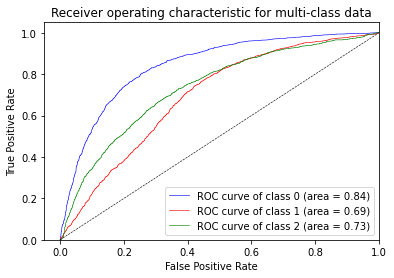

In [56]:
model_evaluation(model1=LogisticRegression(max_iter = 1000))

XGB

C:\Users\Fannie\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Time: 14.144911527633667

Validation Set

Accuracy: 0.66
Auc: 0.82
Macros:
F1 Score: 0.6267597227783978
Precision: 0.6533145809216375
Recall: 0.6220410694575086
Micros:
F1 Score: 0.6649889269176565
Precision: 0.6649889269176565
Recall: 0.6649889269176565
Detail Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      4361
           1       0.56      0.58      0.57      3124
           2       0.67      0.43      0.52      2449

    accuracy                           0.66      9934
   macro avg       0.65      0.62      0.63      9934
weighted avg       0.66      0.66      0.65      9934

Test Set

Accuracy: 0.67
Auc:

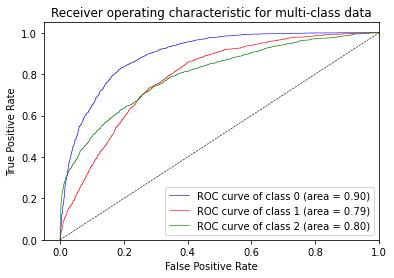

In [57]:
import xgboost as xgb
model_evaluation(model1=xgb.XGBClassifier())

Decision Tree

Training Time: 3.9590952396392822

Validation Set

Accuracy: 0.56
Auc: 0.66
Macros:
F1 Score: 0.5398034662383788
Precision: 0.5394937689247599
Recall: 0.5401653098159328
Micros:
F1 Score: 0.5623112542782364
Precision: 0.5623112542782364
Recall: 0.5623112542782364
Detail Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      4361
           1       0.47      0.47      0.47      3124
           2       0.46      0.47      0.47      2449

    accuracy                           0.56      9934
   macro avg       0.54      0.54      0.54      9934
weighted avg       0.56      0.56      0.56      9934

Test Set

Accuracy: 0.56
Auc: 0.66
Macros:
F1 Score: 0.5371740720740908
Precision: 0.5377255117892804
Recall: 0.5367229545952819
Micros:
F1 Score: 0.5615147671679652
Precision: 0.5615147671679652
Recall: 0.5615147671679652
Detail Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69    

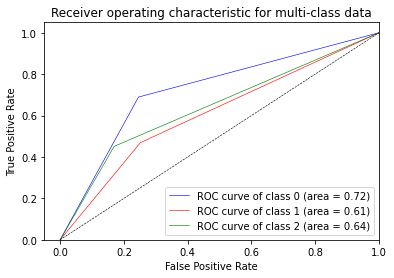

In [58]:
model_evaluation(model1=tree.DecisionTreeClassifier())

KNN

Training Time: 165.4017207622528

Validation Set

Accuracy: 0.49
Auc: 0.63
Macros:
F1 Score: 0.36631267260694655
Precision: 0.42824045227542623
Recall: 0.4046751598635084
Micros:
F1 Score: 0.4858063217233743
Precision: 0.4858063217233743
Recall: 0.4858063217233743
Detail Report:
              precision    recall  f1-score   support

           0       0.51      0.89      0.65      4361
           1       0.43      0.22      0.29      3124
           2       0.34      0.10      0.16      2449

    accuracy                           0.49      9934
   macro avg       0.43      0.40      0.37      9934
weighted avg       0.44      0.49      0.42      9934

Test Set

Accuracy: 0.49
Auc: 0.63
Macros:
F1 Score: 0.3678636633017935
Precision: 0.42928061134814216
Recall: 0.40585383242003154
Micros:
F1 Score: 0.48704475448450807
Precision: 0.48704475448450807
Recall: 0.48704475448450807
Detail Report:
              precision    recall  f1-score   support

           0       0.51      0.89      0.

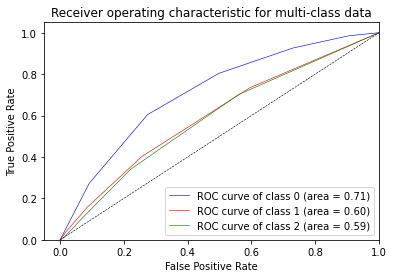

In [59]:
model_evaluation(model1=KNeighborsClassifier())

RandomForest

Training Time: 24.881465911865234

Validation Set

Accuracy: 0.64
Auc: 0.8
Macros:
F1 Score: 0.5867980922699071
Precision: 0.6344965154380412
Recall: 0.5887569686929267
Micros:
F1 Score: 0.6406281457620294
Precision: 0.6406281457620294
Recall: 0.6406281457620294
Detail Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      4361
           1       0.52      0.61      0.56      3124
           2       0.66      0.31      0.42      2449

    accuracy                           0.64      9934
   macro avg       0.63      0.59      0.59      9934
weighted avg       0.64      0.64      0.62      9934

Test Set

Accuracy: 0.64
Auc: 0.8
Macros:
F1 Score: 0.5848913641472074
Precision: 0.6314586061938915
Recall: 0.5891458605728713
Micros:
F1 Score: 0.6448631998550463
Precision: 0.6448631998550463
Recall: 0.6448631998550463
Detail Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      

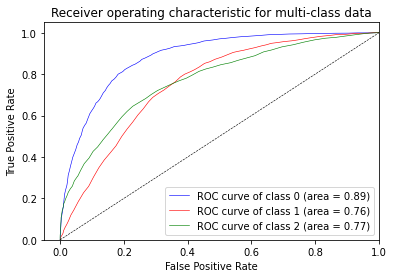

In [60]:
model_evaluation(model1=RandomForestClassifier())

MLP

Training Time: 27.287930488586426

Validation Set

Accuracy: 0.56
Auc: 0.72
Macros:
F1 Score: 0.42867085692613527
Precision: 0.4566993596823175
Recall: 0.5013442685053463
Micros:
F1 Score: 0.562411918663177
Precision: 0.562411918663177
Recall: 0.562411918663177
Detail Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      4361
           1       0.43      0.79      0.56      3124
           2       0.20      0.00      0.00      2449

    accuracy                           0.56      9934
   macro avg       0.46      0.50      0.43      9934
weighted avg       0.51      0.56      0.50      9934

Test Set

Accuracy: 0.57
Auc: 0.73
Macros:
F1 Score: 0.4394679008449342
Precision: 0.6499702280838099
Recall: 0.5134333845502841
Micros:
F1 Score: 0.5749229932958869
Precision: 0.5749229932958869
Recall: 0.5749229932958869
Detail Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      

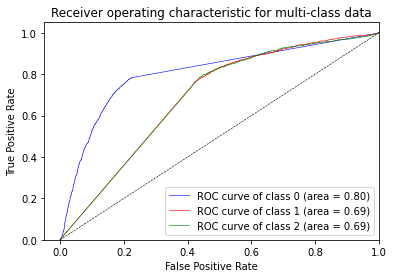

In [61]:
from sklearn.neural_network import MLPClassifier
model_evaluation(model1=MLPClassifier(random_state=1, max_iter=500))

In [12]:
from sklearn.model_selection import GridSearchCV
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [27]:
import xgboost as xgb
model = xgb.XGBClassifier()
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

model, pred = algorithm_pipeline(X_train1, X_valid, y_train1.astype(int), y_valid, model, 
                                     param_grid, cv=5)


print(model.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 52.7min finished
C:\Users\11638\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\11638\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

[17:46:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 60}


In [35]:
    t0 = time()
    model1 = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 8, n_estimators = 60)
   # X_train1, X_valid, y_train1.astype(int), y_valid
    model1.fit(X_train1, y_train1.astype(int))
    ## test
    predicted = model1.predict(X_valid)
    predicted_prob = model1.predict_proba(X_valid)
    print('Training Time:', time() - t0)
    print('')
    accuracy = metrics.accuracy_score(y_valid, predicted)
    auc = metrics.roc_auc_score(y_valid, predicted_prob, 
                                multi_class="ovr")
    print('\033[1m' + 'Validation Set')
    print('\033[0m')
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print('Macros:')
    print("F1 Score:", f1_score(y_valid, predicted, average='macro'))
    print("Precision:", precision_score(y_valid, predicted, average='macro'))
    print("Recall:", recall_score(y_valid, predicted, average='macro'))
    print('Micros:')
    print("F1 Score:", f1_score(y_valid, predicted, average='micro'))
    print("Precision:", precision_score(y_valid, predicted, average='micro'))
    print("Recall:", recall_score(y_valid, predicted, average='micro'))


    print("Detail Report:")
    print(metrics.classification_report(y_valid, predicted))

    #X_train, X_test,y_train,y_test
    predicted = model1.predict(X_test)
    predicted_prob = model1.predict_proba(X_test)
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted_prob, 
                                multi_class="ovr")
    print('\033[1m' + 'Test Set')
    print('\033[0m')
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print('Macros:')
    print("F1 Score:", f1_score(y_test, predicted, average='macro'))
    print("Precision:", precision_score(y_test, predicted, average='macro'))
    print("Recall:", recall_score(y_test, predicted, average='macro'))
    print('Micros:')
    print("F1 Score:", f1_score(y_test, predicted, average='micro'))
    print("Precision:", precision_score(y_test, predicted, average='micro'))
    print("Recall:", recall_score(y_test, predicted, average='micro'))

    print("Detail Report:")
    print(metrics.classification_report(y_test, predicted))
    

C:\Users\11638\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\11638\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[17:58:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Time: 7.656193494796753

Validation Set

Accuracy: 0.68
Auc: 0.83
Macros:
F1 Score: 0.651944408457491
Precision: 0.6928122639030327
Recall: 0.6439626803181427
Micros:
F1 Score: 0.6833098449768472
Precision: 0.6833098449768472
Recall: 0.6833098449768472
Detail Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      4361
           1       0.58      0.63      0.60      3124
           2       0.77      0.45      0.56      2449

    accuracy                           0.68      9934
   macro avg       0.69      0.64      0.65      9934
weighted avg       0.69      0.68      0.67      9934

Test Set

Accuracy: 0.68
Auc: 0